<a href="https://colab.research.google.com/github/Wilian21/Balanceo_Datos-Clasificadores_Binarios/blob/main/TecnicasBalanceo_ClasificadoresBinarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

InstalaciOn libreria balanceo de datos

In [ ]:
pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
#---------------------
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE

LEER CSV

In [ ]:
df = pd.read_csv("pe_section_headers.csv")
df.head(5)

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1


In [ ]:
#Eliminar la columna hash
data= df.drop(['hash'],axis=1)
data.head()
data.shape

(43293, 5)

In [ ]:
#Verificar que los datos sean numericos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   size_of_data     43293 non-null  int64  
 1   virtual_address  43293 non-null  int64  
 2   entropy          43293 non-null  float64
 3   virtual_size     43293 non-null  int64  
 4   malware          43293 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.7 MB


In [ ]:
#Ver si existen datos faltantes
data.isna().sum().sort_values()

size_of_data       0
virtual_address    0
entropy            0
virtual_size       0
malware            0
dtype: int64

In [ ]:
data.drop_duplicates()
print(data.shape)

(43293, 5)


NUMERO DE OBSERVACIONES BINARIAS

In [ ]:
#Ver cuantas clases existe en el dataset
print(data.groupby('malware').size())

malware
0     1725
1    41568
dtype: int64


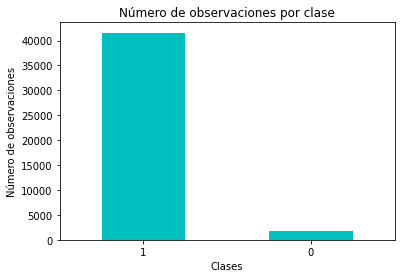

In [ ]:
count_classes = data.value_counts(data['malware'], sort = True)
count_classes.plot(kind = 'bar',rot=0, color="c")
plt.title("Número de observaciones por clase")
plt.xlabel("Clases")
plt.ylabel("Número de observaciones")
plt.show()

DIVIDIR EL DATASET EN X, Y

In [ ]:
#Division del dataset X los atributos
#Y las clases
#X= data[['size_of_data','virtual_address','entropy','virtual_size']]
X=data.iloc[:,:-1]
y = data['malware']

print(X.shape)
print(y.shape)

(43293, 4)
(43293,)


In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[-1.65823308e-01 -4.70320638e-02  1.60502208e-01 -1.69751884e-01]
 [-2.61375786e-01 -4.70320638e-02  2.42860621e-01 -2.64214120e-01]
 [-4.80404753e-01 -4.70320638e-02 -3.71902961e-01 -4.80555372e-01]
 ...
 [-3.20277998e-01 -4.70320638e-02  2.80161311e-01 -3.22172006e-01]
 [-1.65823308e-01 -4.70320638e-02  1.60502208e-01 -1.69751884e-01]
 [ 1.41340821e-01 -4.70320638e-02  1.47659537e-04  1.33833915e-01]]


CREACION DE STRATIFIEDKFOLD

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
kf=StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=None)

for train_index, test_index in kf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [34072 40279 16011 ...  1171 22513 38030] TEST: [19225  6827  4238 ... 25375 10649 16852]
TRAIN: [ 6618 42552 16821 ...  1870 42818 18311] TEST: [40715 20005 34129 ...  1448  2420 29243]
TRAIN: [25462 33804 15970 ... 19314 35889  7785] TEST: [38809 16663  2327 ... 37938 37744  3712]
TRAIN: [30016  9175 42157 ... 12900  4121 33559] TEST: [20934 28990 25610 ... 21764 28240 43259]
TRAIN: [ 1374 19235 27110 ... 38167 10236 29862] TEST: [16810  9522 30501 ... 10519  4746 28951]
TRAIN: [19205 22810 25702 ... 17546  8041 11751] TEST: [  637 24775 26677 ... 16560  7929 32446]
TRAIN: [13826 27555 23867 ...   259  3616  3636] TEST: [25121   100    61 ... 32098 26971 32881]
TRAIN: [19633 15363 33505 ...  8777  7360 27960] TEST: [37868  6620 34426 ... 34494 11173 23282]
TRAIN: [14900  1239 21995 ... 34785  2314 32705] TEST: [41143 32622 13873 ... 36195  5054 26712]
TRAIN: [ 7123   902 33482 ... 18604 24099 23539] TEST: [11709 26984 25513 ... 13080 25771  9718]


CREACION DE ALGORITMOS

In [ ]:
########### REGRESION LOGISTICA ##############
rl = LogisticRegression(penalty='l2', dual=False, tol=0.0001,class_weight='balanced', solver='lbfgs',
                        multi_class='ovr')

#class_weight='balanced', 
rlB = LogisticRegression(penalty='l2', dual=False, tol=0.0001,solver='lbfgs', multi_class='ovr')

########### RANDOM FOREST ##############
rf = RandomForestClassifier(n_estimators=100,bootstrap = True, criterion = 'gini')

########### RED NEURONAL ##############

mlp =MLPClassifier(hidden_layer_sizes = (100),activation='relu', solver='adam',alpha=0.0001,max_iter=2000)

########### NAIVE BAYES ##############
nv=GaussianNB(priors = None , var_smoothing = 1e-09)


TECNICAS DE BALANCEO DE DATOS

In [ ]:
#SMOTETOMEK
stomek = SMOTETomek(sampling_strategy='auto',random_state= None, smote=None,tomek=None)
X_stomek, y_smotek = stomek.fit_resample(X, y)
print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smotek)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 41020, 0: 41020})


In [ ]:
#NEARMISS
near = NearMiss(sampling_strategy= 0.5, version=2, n_neighbors=3,n_neighbors_ver3=3)
X_near, y_near= near.fit_resample(X, y)
print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_near)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 3450, 0: 1725})


In [ ]:
#SMOTEEN
smoteen = SMOTEENN(sampling_strategy='auto',random_state=None, smote=None, enn=None)
X_smoteen, y_smoteen = smoteen.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smoteen)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 37985, 0: 30458})


In [ ]:
#SMOTE
smote = SMOTE(sampling_strategy=0.9858,random_state=None, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smote)))

Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 41568, 0: 40977})


FUNCION DE VALIDACION CRUZADA

In [ ]:
def validacion(entrenamiento,prueba,modelo):
  start = time.time()
  TN=[]
  FP=[]
  FN=[]
  TP=[]
  ac=[]
  fs=[]
  pre=[]
  re=[]
  pr0=[]
  re0=[]
  f10=[]
  pr1=[]
  re1=[]
  f11=[]
  for train, test in kf.split(entrenamiento,prueba):
    X_train, X_test = entrenamiento[train], entrenamiento[test]
    end = time.time()
    start1=time.time()
    y_train, y_test = prueba.iloc[train], prueba.iloc[test]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    #print(y_pred)
    conf = confusion_matrix(y_test,y_pred)
    TN.append(conf[0,0])
    FP.append(conf[0,1])
    FN.append(conf[1,0])
    TP.append(conf[1,1])
    accy = metrics.accuracy_score(y_test, y_pred)
    ac.append(accy)
    f1= metrics.f1_score(y_test, y_pred)
    fs.append(f1)
    presi = metrics.precision_score(y_test, y_pred)
    pre.append(presi)
    reca = metrics.recall_score(y_test, y_pred)
    re.append(reca)
    #print(accy,"---",f1,"---",presi,"---",reca)
    #print("MatrizConfusion")
    #print("----------------- SPLIT {} ----------------------".format(cont))
    #print(conf)
    a=classification_report(y_test,y_pred,output_dict=True)
    l0 = ['0',"precision", "recall", "f1-score"]
    l1=['1',"precision", "recall", "f1-score"]
    result = list(map(a.get, l0))
    result1= list(map(a.get,l1))
    #print(result)
    pr0.append(result[0]['precision'])
    re0.append(result[0]['recall'])
    f10.append(result[0]['f1-score'])
    pr1.append(result1[0]['precision'])
    re1.append(result1[0]['recall'])
    f11.append(result1[0]['f1-score'])
    end1=time.time()

  
  print("MATRIZ DE CONFUSION")
  print('[[{} {} ] '.format(round(np.mean(TN)),(round(np.mean(FP)))))
  print(' [{} {} ]]'.format(round(np.mean(FN)),(round(np.mean(TP)))))
  print("----------Medidas de rendimiento------------")
  print('Accuracy {}'.format(np.mean(ac)))   
  print('F1-Score {}'.format(np.mean(fs)))
  print('Presicion {}'.format(np.mean(pre)))
  print('Recall {}'.format(np.mean(re)))
  TNF=round(np.mean(TN))/(round(np.mean(TN)) + round(np.mean(FN)))
  print('TNR {}'.format(TNF))

  print("-----------Reporte por clase-------------------")
  print("         Presicion   Recall   F1-Score")
  print('Clase 0:  {:.3f}     {:.3f}    {:.3f} '.format(np.mean(pr0),np.mean(re0),np.mean(f10)))
  print('Clase 1:  {:.3f}     {:.3f}    {:.3f} '.format(np.mean(pr1),np.mean(re1),np.mean(f11)))
  print("----------------------------------------")
  print("Tiempo de entrenamiento:", end - start,"seg")
  print("Tiempo de validacion:", end1 - start1,"seg")

REGRESION LOGISTICA SIN BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA SIN BALANCEO DE DATOS
validacion(X,y,rl)

MATRIZ DE CONFUSION
[[185 160 ] 
 [2213 6101 ]]
----------Medidas de rendimiento------------
Accuracy 0.7259614274165609
F1-Score 0.8370029089395403
Presicion 0.9744792660318362
Recall 0.7337984123165745
TNR 0.07714762301918265
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.078     0.537    0.136 
Clase 1:  0.974     0.734    0.837 
----------------------------------------
Tiempo de entrenamiento: 2.3061771392822266 seg
Tiempo de validacion: 0.2043156623840332 seg


REGRESION LOGISTICA CON BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA CON BALANCEO DE DATOS 
print("NEARMISS")
validacion(X_near,y_near,rlB)

NEARMISS
MATRIZ DE CONFUSION
[[313 32 ] 
 [0 690 ]]
----------Medidas de rendimiento------------
Accuracy 0.9693719806763283
F1-Score 0.9775669679573358
Presicion 0.9561588425139774
Recall 1.0
TNR 1.0
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  1.000     0.908    0.952 
Clase 1:  0.956     1.000    0.978 
----------------------------------------
Tiempo de entrenamiento: 0.4541919231414795 seg
Tiempo de validacion: 0.04169130325317383 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rlB)

SMOTETOMEK
MATRIZ DE CONFUSION
[[4734 3470 ] 
 [2387 5817 ]]
----------Medidas de rendimiento------------
Accuracy 0.6430521696733301
F1-Score 0.6650280442755957
Presicion 0.6262640869703576
Recall 0.7090321794246709
TNR 0.664794270467631
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.665     0.577    0.618 
Clase 1:  0.626     0.709    0.665 
----------------------------------------
Tiempo de entrenamiento: 6.169559478759766 seg
Tiempo de validacion: 0.4159972667694092 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rlB)

SMOTEENN
MATRIZ DE CONFUSION
[[375 5717 ] 
 [600 6996 ]]
----------Medidas de rendimiento------------
Accuracy 0.5385126744101103
F1-Score 0.6889600838283492
Presicion 0.550329821854156
Recall 0.9209556403843623
TNR 0.38461538461538464
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.384     0.062    0.106 
Clase 1:  0.550     0.921    0.689 
----------------------------------------
Tiempo de entrenamiento: 5.535931825637817 seg
Tiempo de validacion: 0.8319168090820312 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,rlB)

SMOTE
MATRIZ DE CONFUSION
[[3894 4300 ] 
 [1516 6798 ]]
----------Medidas de rendimiento------------
Accuracy 0.6476770246532195
F1-Score 0.7003697090607345
Presicion 0.6125224990671655
Recall 0.8176569641568439
TNR 0.7197781885397412
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.720     0.475    0.572 
Clase 1:  0.613     0.818    0.700 
----------------------------------------
Tiempo de entrenamiento: 6.068886041641235 seg
Tiempo de validacion: 0.8094577789306641 seg


RANDOM FOREST SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,rf)

MATRIZ DE CONFUSION
[[155 190 ] 
 [82 8232 ]]
----------Medidas de rendimiento------------
Accuracy 0.9685875967201755
F1-Score 0.9837481960188924
Presicion 0.9774067204222809
Recall 0.9901732018282414
TNR 0.6540084388185654
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.655     0.448    0.532 
Clase 1:  0.977     0.990    0.984 
----------------------------------------
Tiempo de entrenamiento: 33.016489028930664 seg
Tiempo de validacion: 3.5122363567352295 seg


RANDOM FOREST CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,rf)

NEARMISS
MATRIZ DE CONFUSION
[[336 8 ] 
 [6 684 ]]
----------Medidas de rendimiento------------
Accuracy 0.9858937198067632
F1-Score 0.9894428279350317
Presicion 0.9877477137978833
Recall 0.991159420289855
TNR 0.9824561403508771
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.982     0.975    0.979 
Clase 1:  0.988     0.991    0.989 
----------------------------------------
Tiempo de entrenamiento: 2.993788957595825 seg
Tiempo de validacion: 0.3280777931213379 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rf)

SMOTETOMEK
MATRIZ DE CONFUSION
[[8040 164 ] 
 [341 7863 ]]
----------Medidas de rendimiento------------
Accuracy 0.9692162359824475
F1-Score 0.9688811504177434
Presicion 0.9795472436247212
Recall 0.9584470989761094
TNR 0.9593127311776638
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.959     0.980    0.970 
Clase 1:  0.980     0.958    0.969 
----------------------------------------
Tiempo de entrenamiento: 89.50035214424133 seg
Tiempo de validacion: 9.83968472480774 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rf)

SMOTEENN
MATRIZ DE CONFUSION
[[6048 44 ] 
 [81 7516 ]]
----------Medidas de rendimiento------------
Accuracy 0.9908612754766601
F1-Score 0.9917464831495663
Presicion 0.9941542546449311
Recall 0.9893510596288009
TNR 0.986784140969163
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.987     0.993    0.990 
Clase 1:  0.994     0.989    0.992 
----------------------------------------
Tiempo de entrenamiento: 69.43950629234314 seg
Tiempo de validacion: 7.64402437210083 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,rf)

SMOTE
MATRIZ DE CONFUSION
[[7998 197 ] 
 [409 7905 ]]
----------Medidas de rendimiento------------
Accuracy 0.9633109213156459
F1-Score 0.9631027353540738
Presicion 0.9757022436826437
Recall 0.9508299254269905
TNR 0.9513500654216724
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.951     0.976    0.964 
Clase 1:  0.976     0.951    0.963 
----------------------------------------
Tiempo de entrenamiento: 90.98102712631226 seg
Tiempo de validacion: 9.87242317199707 seg


NAIVE BAYES SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,nv)

MATRIZ DE CONFUSION
[[52 293 ] 
 [1383 6931 ]]
----------Medidas de rendimiento------------
Accuracy 0.806455710821111
F1-Score 0.8711671019377487
Presicion 0.9610486716799203
Recall 0.8336420495549675
TNR 0.03623693379790941
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.030     0.151    0.045 
Clase 1:  0.961     0.834    0.871 
----------------------------------------
Tiempo de entrenamiento: 0.5504047870635986 seg
Tiempo de validacion: 0.03887820243835449 seg


NAIVE BAYES CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,nv)

NEARMISS
MATRIZ DE CONFUSION
[[316 29 ] 
 [7 683 ]]
----------Medidas de rendimiento------------
Accuracy 0.9656038647342996
F1-Score 0.9746156013070275
Presicion 0.9595825878047647
Recall 0.990144927536232
TNR 0.978328173374613
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.979     0.917    0.947 
Clase 1:  0.960     0.990    0.975 
----------------------------------------
Tiempo de entrenamiento: 0.13540101051330566 seg
Tiempo de validacion: 0.011385440826416016 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,nv)

SMOTETOMEK
MATRIZ DE CONFUSION
[[7963 241 ] 
 [6949 1255 ]]
----------Medidas de rendimiento------------
Accuracy 0.5617808386153096
F1-Score 0.2587145274996437
Presicion 0.8387853242417529
Recall 0.1529741589468552
TNR 0.5339994635193133
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.534     0.971    0.689 
Clase 1:  0.839     0.153    0.259 
----------------------------------------
Tiempo de entrenamiento: 1.1689298152923584 seg
Tiempo de validacion: 0.07889509201049805 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,nv)

SMOTEENN
MATRIZ DE CONFUSION
[[5846 246 ] 
 [6293 1304 ]]
----------Medidas de rendimiento------------
Accuracy 0.5222806633063043
F1-Score 0.2849832837458989
Presicion 0.84162120593887
Recall 0.17159405028300642
TNR 0.4815882692149271
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.482     0.960    0.641 
Clase 1:  0.842     0.172    0.285 
----------------------------------------
Tiempo de entrenamiento: 0.9396014213562012 seg
Tiempo de validacion: 0.07279372215270996 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,nv)

SMOTE
MATRIZ DE CONFUSION
[[7946 249 ] 
 [7055 1259 ]]
----------Medidas de rendimiento------------
Accuracy 0.5575807135501847
F1-Score 0.2563503854470187
Presicion 0.8350998055429472
Recall 0.15144334856867933
TNR 0.5296980201319912
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.530     0.970    0.685 
Clase 1:  0.835     0.151    0.256 
----------------------------------------
Tiempo de entrenamiento: 1.1167984008789062 seg
Tiempo de validacion: 0.08616185188293457 seg


RED NEURONAL SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,mlp)

MATRIZ DE CONFUSION
[[3 342 ] 
 [3 8311 ]]
----------Medidas de rendimiento------------
Accuracy 0.9601801593717522
F1-Score 0.9796782030294319
Presicion 0.9604877617649237
Recall 0.9996511907625691
TNR 0.5
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.537     0.009    0.018 
Clase 1:  0.960     1.000    0.980 
----------------------------------------
Tiempo de entrenamiento: 168.65752148628235 seg
Tiempo de validacion: 17.606956005096436 seg


RED NEURONAL CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,mlp)

NEARMISS
MATRIZ DE CONFUSION
[[329 16 ] 
 [5 685 ]]
----------Medidas de rendimiento------------
Accuracy 0.9794202898550723
F1-Score 0.9846858787186761
Presicion 0.9773180508490672
Recall 0.9921739130434784
TNR 0.9850299401197605
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.984     0.954    0.969 
Clase 1:  0.977     0.992    0.985 
----------------------------------------
Tiempo de entrenamiento: 48.58327507972717 seg
Tiempo de validacion: 4.090853691101074 seg


In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,mlp)

SMOTETOMEK
MATRIZ DE CONFUSION
[[6820 1384 ] 
 [1937 6267 ]]
----------Medidas de rendimiento------------
Accuracy 0.797549975621648
F1-Score 0.7900966379333656
Presicion 0.8203407959541973
Recall 0.763846903949293
TNR 0.7788055270069658
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.780     0.831    0.804 
Clase 1:  0.820     0.764    0.790 
----------------------------------------
Tiempo de entrenamiento: 1602.566826581955 seg
Tiempo de validacion: 179.97790813446045 seg


In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,mlp)

SMOTEENN
MATRIZ DE CONFUSION
[[4689 1403 ] 
 [1146 6451 ]]
----------Medidas de rendimiento------------
Accuracy 0.813770180436847
F1-Score 0.8350263866854084
Presicion 0.8216889987804077
Recall 0.8490983282874819
TNR 0.803598971722365
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.804     0.770    0.786 
Clase 1:  0.822     0.849    0.835 
----------------------------------------
Tiempo de entrenamiento: 1590.3000373840332 seg
Tiempo de validacion: 234.14804983139038 seg


In [ ]:
print("SMOTE")
validacion(X_smote,y_smote,mlp)

SMOTE
MATRIZ DE CONFUSION
[[6732 1463 ] 
 [2046 6268 ]]
----------Medidas de rendimiento------------
Accuracy 0.7874856139075656
F1-Score 0.7806497850908599
Presicion 0.8126958494634829
Recall 0.7539451527543901
TNR 0.7669172932330827
-----------Reporte por clase-------------------
         Presicion   Recall   F1-Score
Clase 0:  0.769     0.822    0.793 
Clase 1:  0.813     0.754    0.781 
----------------------------------------
Tiempo de entrenamiento: 1850.9496982097626 seg
Tiempo de validacion: 230.54356694221497 seg
